In [161]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline
from pycbc.waveform import get_td_waveform
from lmfit import Model

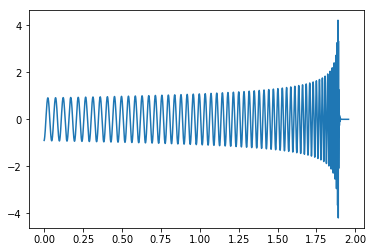

In [162]:
m1 = 15
m2 = 25
f = 20
apx = 'SEOBNRv2'
hp, hc = get_td_waveform(approximant=apx,
                             mass1=m1,
                             mass2=m2,
                             delta_t=1.0/4096,
                             f_lower=f)
curve = np.column_stack((hp.sample_times,hp*10**19))
curve[:,0] = curve[:,0]-curve[:,0][0]
plt.plot(curve[:,0],curve[:,1])

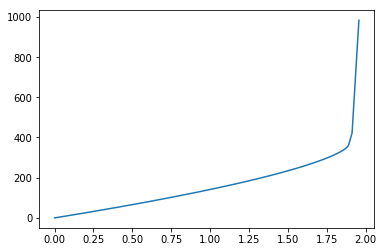

In [163]:
x_sim = curve[:,0]
y = curve[:,1]

# Get the phase
zeros = []
cs = CubicSpline(x_sim,y)
x_phi = np.arange(np.round(min(x_sim),3),np.round(max(x_sim)+0.00001,3),0.00001)
y_phi = cs(x_phi)
for j in range(len(x_phi)-1):#,int(96/100*len(x))):
    if y_phi[j]*y_phi[j+1]<0:
        zeros = zeros + [x_phi[j]]
pis = np.arange(0,len(zeros),1)*np.pi

cs_phase = CubicSpline(zeros,pis)
yy_phi = cs_phase(x_sim)

plt.plot(x_sim,yy_phi)

In [164]:
t_star = 4.92*10**(-6)
w = f*2*np.pi*t_star

t0 = (5/4**(8/3)*w**(-8/3)*(m1+m2)**(1/3)/(m1*m2))*t_star 
print(t0)
def theta(m1,m2,t):
    return 2*(5/256)**(3/8)*(m1+m2)**(1/8)/(m1*m2)**(3/8)*(-8/5*((t0-t)/t_star)**(5/8))

2.005844590180839


In [166]:
good_x = x_sim-x_sim[-1]
good_y_analytic = theta(m1,m2,x_sim)-theta(m1,m2,x_sim)[0]-max(theta(m1,m2,x_sim)-theta(m1,m2,x_sim)[0])

good_y_python = yy_phi-yy_phi[0]+good_y_analytic[0]


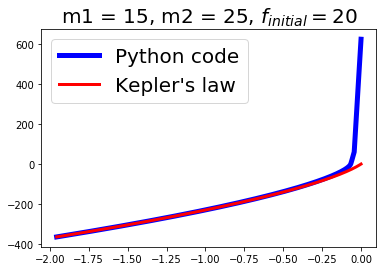

In [167]:
# plt.axis([-0.05,0.1,-50,50])
plt.plot(good_x,good_y_python,"b-",linewidth=5,label="Python code")
plt.plot(good_x,good_y_analytic,"r-",linewidth=3,label="Kepler's law")
plt.title("m1 = %s, m2 = %s, $f_{initial}=%s $" %(m1,m2,f), fontsize=20)
plt.legend(loc = "upper left",fontsize=20)